# Méthodes Factorielles sur Python

#### Préambule 
L’analyse en composantes principales (ACP) est une technique factorielle où l’on essaie de résumer ou regrouper les descripteurs dans leurs dimensions les plus importantes représentées par des variables synthétiques appelées composantes ; comme une technique de visualisation où l’on essaie de préserver les proximités entre les individus dans un espace de représentation réduit ; comme une technique de compression de l’information ; etc.

Le succès de l’ACP repose en très grande partie sur la richesse des représentations graphiques qu’elle propose. Elle sont accompagnées d’outils d’aide à l’interprétation qui permettent de saisir la teneur des composantes (facteurs, axes factoriels) mises en évidence. Les très nombreux exemples illustratifs que l’on trouve ici ou là soulignent ses propriétés descriptives sur des jeux de données de taille réduite, elles permettent de mettre en relation les résultats observés avec des connaissances du domaine. Nous ne dérogerons pas à cette règle.

Mais le champ d’application de l’ACP est plus large. Elle joue un rôle important comme outil de défrichage des grandes bases de données, tant en nombre d’observations que de variables. En réduisant la dimensionnalité avec une perte d’information contrôlée, elle peut constituer une solution de prétraitement privilégiée avant l’utilisation des techniques de machine learning.

Son rôle complémentaire par rapport aux techniques de classification automatique (clustering) en particulier est souligné dans la littérature (Lebart et al., 2000)

#####  Principe de l’analyse en composantes principales
1. Tableau individus-variables

L’analyse en composantes principales traite les tableaux individus-variables, lesquelles sont toutes quantitatives. Nous utilisons le jeu de données « Burger_ACP ». Il décrit les (p = 10) caractéristiques de (n = 17) burgers.



In [42]:
import pandas as pd 

In [43]:
D = pd.read_excel("Data_Methodes_Factorielles_python.xlsx",sheet_name="BURGER_ACP",index_col=0) 

In [44]:
D = D.iloc[:, :-2]
D

,Calories,Fat_Cal,Protein,Fat,Sat_Fat,Chol,Sodium,Carbs,Fiber,Sugar
ITEM,,,,,,,,,,
BK__Double_Stacker,3.2370,1.8497,0.1734,0.2081,0.0867,0.6358,6.0116,0.1676,0.0058,0.0405
BK_CHICKENFRIES(12pc),2.9412,1.5294,0.1647,0.1706,0.0294,0.3235,9.5882,0.1882,0.0176,0.0059
Buck_Double,2.5949,1.2658,0.1519,0.1392,0.0633,0.5380,4.6835,0.1772,0.0063,0.0380
CHICKENTENDERS_Sandwich,3.0986,1.7606,0.0845,0.1972,0.0317,0.2465,4.2958,0.2465,0.0070,0.0282
ChocolateFudgeSundae,1.6763,0.4046,0.0347,0.0462,0.0405,0.1156,1.3295,0.3064,0.0058,0.2601
DanishApple,3.6719,1.5625,0.0469,0.1719,0.0781,0.0391,4.0625,0.4844,0.0078,0.2266
Double_Cheeseburger,2.6316,1.3450,0.1520,0.1520,0.0702,0.5556,5.6140,0.1696,0.0058,0.0351
Double_Hamburger,2.4658,1.0959,0.1507,0.1233,0.0548,0.4795,3.5616,0.1918,0.0068,0.0411
Double_Bacon_Cheeseburger,2.8177,1.4917,0.1713,0.1657,0.0773,0.5801,6.3536,0.1602,0.0055,0.0387


Les questions qui viennent naturellement à l’esprit à la lecture de ce type de tableau sont :

**- Quels sont les burgers qui se ressemblent ? Qui s’opposent ? Sur quelles caractéristiques (variables) sont fondées ces ressemblances et dissemblances.**

**- Quelles sont les relations entre les variables.**

1. 1 Analyse proximité des individus

Contentons-nous de traiter les variables Calories et Fat_Cal dans un premier temps. Nous pouvons représenter les observations dans le plan.

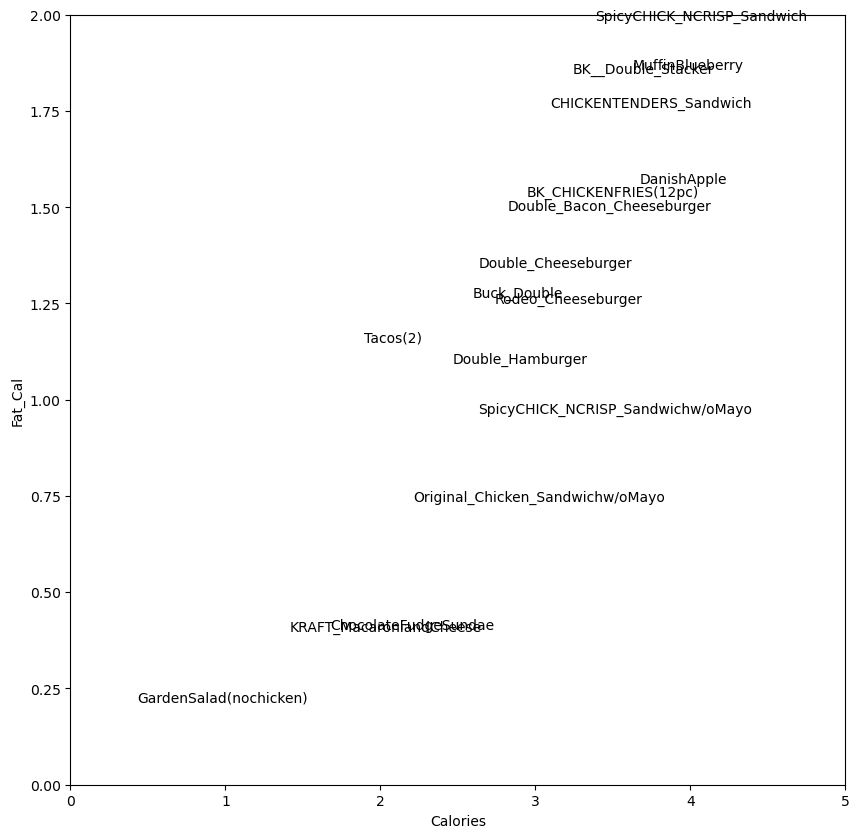

In [45]:
#importer la librairie graphique 

import matplotlib.pyplot as plt

#préparer le graphique 

fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(D.Calories,D.Fat_Cal,"wo") 
ax.axis([0,5,0,2]) 
ax.set_xlabel("Calories") 
ax.set_ylabel("Fat_Cal")

#ajouter les labels des burgers
for i in D.index: 
    ax.text(D.Calories[i],D.Fat_Cal[i],i) 

#faire afficher 

plt.show() 

**Quels commentaires pouvons-nous faire?**

**Faire ressortir les faits majeurs du graphique à partir d'un tableau réduit**

In [46]:
#afficher les deux variables en triant selon Calorie

Dbis = D.sort_values(by="Calories",ascending=True)[['Calories','Fat_Cal']] 
print(Dbis)


                                   Calories  Fat_Cal
ITEM                                                
GardenSalad(nochicken)               0.4321   0.2160
KRAFT_MacaroniandCheese              1.4159   0.3982
ChocolateFudgeSundae                 1.6763   0.4046
Tacos(2)                             1.8966   1.1494
Original_Chicken_Sandwichw/oMayo     2.2105   0.7368
Double_Hamburger                     2.4658   1.0959
Buck_Double                          2.5949   1.2658
Double_Cheeseburger                  2.6316   1.3450
SpicyCHICK_NCRISP_Sandwichw/oMayo    2.6316   0.9649
Rodeo_Cheeseburger                   2.7344   1.2500
Double_Bacon_Cheeseburger            2.8177   1.4917
BK_CHICKENFRIES(12pc)                2.9412   1.5294
CHICKENTENDERS_Sandwich              3.0986   1.7606
BK__Double_Stacker                   3.2370   1.8497
SpicyCHICK_NCRISP_Sandwich           3.3824   1.9853
MuffinBlueberry                      3.6283   1.8584
DanishApple                          3.6719   

1. 2 Représentation des variables

Lorsque (p = 3), un graphique en 3 dimensions reste gérable, même s’il est moins lisible. Au-delà, nous sommes démunis. Quand elles ne sont pas trop nombreuses, on utilise souvent les « pairplot » qui sont constitués de nuages de points des variables prises deux à deux. Espérer y déceler des informations fines sur les proximités entre les individus est illusoire. Lire plusieurs cadrans simultanément n’est pas facile, et étiqueter les observations rendrait le tout totalement illisible. Ce type de graphique sert surtout à effectuer un diagnostic rapide des données : identifier les configurations incongrues (des blocs dans les observations par exemple), les liaisons fortes, ou encore la présence de points atypiques.



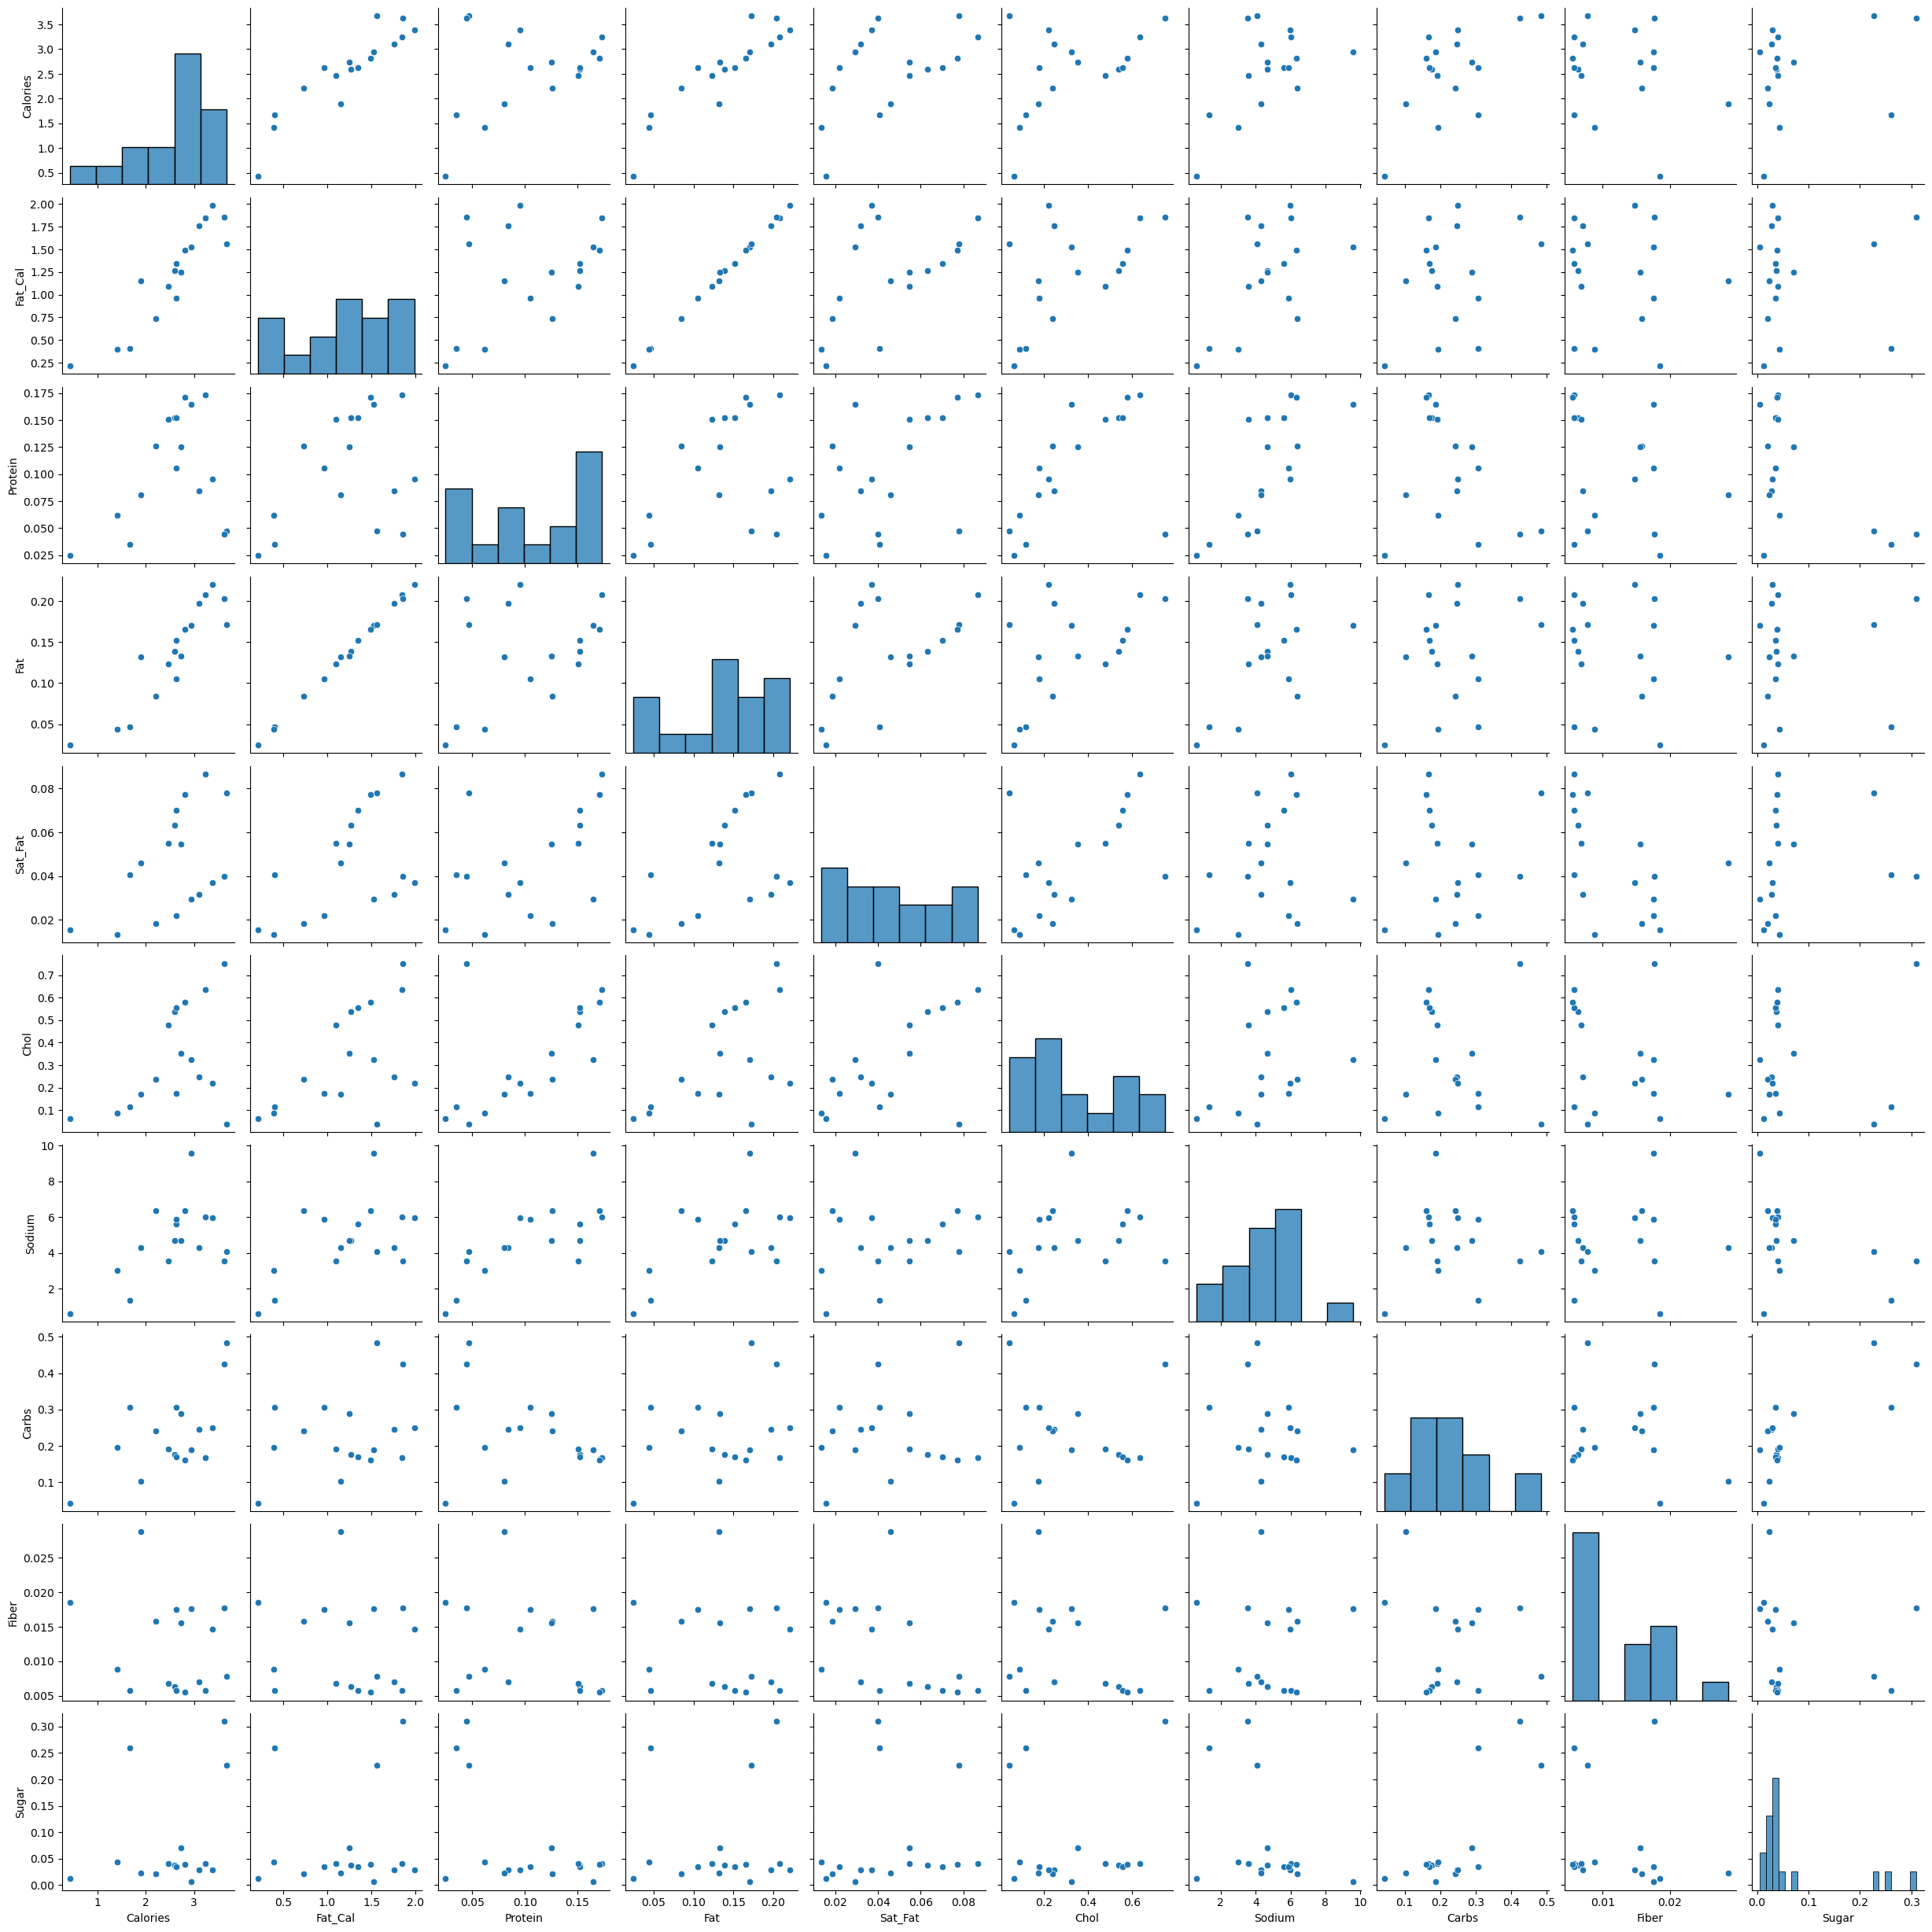

In [47]:
#librairie graphique 
import seaborn as sns 
# pairplot 
sns.pairplot(D)

L’analyse en composantes principales vise à réduire la dimensionnalité en créant des variables synthétiques, combinaisons linéaires des variables originelles, en nombre réduit (𝒒 ≪𝑝), tout en préservant au mieux l’information. On comprend l’idée. Mais encore faut-il pouvoir : 

- (1) définir et mesurer l’information véhiculée par les données ; 

- (2) quantifier la qualité de restitution du nouvel espace de représentation .

1. 2. 1 Distance entre indivis et Inertie

**Distance euclidienne**. 

La distance permet de mesure le degré d’éloignement entre les individus. La plus usuelle est la distance euclidienne. Entre deux individus (i1) et (i2), elle est définie comme suit :
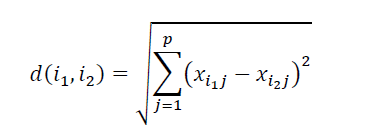

**Calculer les distances entre la « SpicyCHICK_NCRISP_Sandwichw/oMayo » et deux de ses voisins, la « Double_Hamburger » et la « Original_Chicken_Sandwichw/oMayo ».**

In [48]:
#librairie numpy pour les manipulations matricielles 
import numpy as np
#distance entre SpicyCHICK_NCRISP_Sandwichw/oMayo et Double_Hamburger 
np.sqrt(np.sum((Dbis.loc['SpicyCHICK_NCRISP_Sandwichw/oMayo']-Dbis.loc['Double_Hamburger'])**2))

0.21130698048100544

In [49]:
#distance entre SpicyCHICK_NCRISP_Sandwichw/oMayo et Original_Chicken_Sandwichw/oMayo 
np.sqrt(np.sum((Dbis.loc['SpicyCHICK_NCRISP_Sandwichw/oMayo']-Dbis.loc['Original_Chicken_Sandwichw/oMayo'])**2))

0.47891003330479515

**Commentaire: Les résultats ne correspondent pas à l’impression visuelle ci-dessus (Figure 3). Contrairement à ce que l’on perçoit, SpicyCHICK_NCRISP_Sandwichw/oMayo serait nettement plus proche du Double_Hamburger que du Original_Chicken_Sandwichw/oMayo ?**

**Distance euclidienne pondérée**: 

Pour le dataset Burger, une distance euclidienne pondérée est essentielle pour comparer correctement les éléments, car les variables (Calories, Fat, Protein, etc.) ont des unités et des amplitudes très différentes. Par exemple, les valeurs des Calories sont bien plus élevées que celles des Fibers ou Sugars, ce qui pourrait fausser l'analyse si elles étaient comparées directement. La solution consiste à standardiser les variables en les divisant par leur écart-type respectif, ce qui revient à utiliser une distance euclidienne pondérée par l'inverse de la variance. Cela assure que chaque variable contribue équitablement au calcul des distances, indépendamment de son unité ou de son amplitude, permettant ainsi des analyses cohérentes et pertinentes.


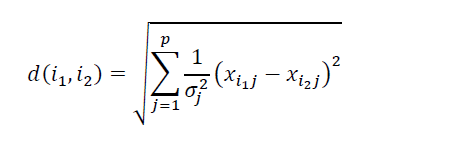

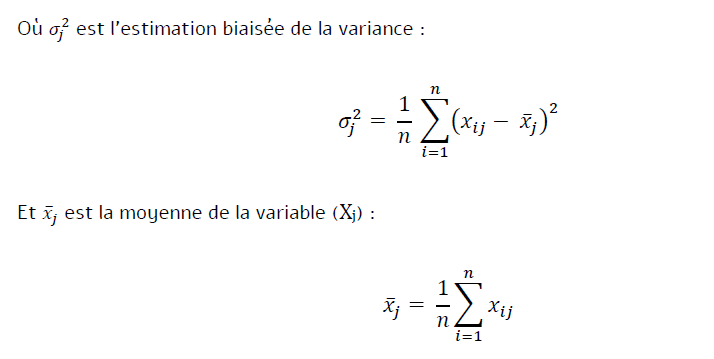

In [50]:
#matrice X numpy – plus facile à manipuler
X = Dbis.values 

#écarts-type des variables Calories et Fat_Cal

sigmas = np.std(X, axis=0, ddof=0)

print(sigmas)

[0.81 0.52]


In [51]:
#distance pondérée entre SpicyCHICK_NCRISP_Sandwichw/oMayo et Double_Hamburger 
np.sqrt(np.sum((1/sigmas**2)*(Dbis.loc['SpicyCHICK_NCRISP_Sandwichw/oMayo']-Dbis.loc['Double_Hamburger'])**2))

0.3228738791594171

In [52]:
#distance entre SpicyCHICK_NCRISP_Sandwichw/oMayo et Original_Chicken_Sandwichw/oMayo 
np.sqrt(np.sum((1/sigmas**2)*(Dbis.loc['SpicyCHICK_NCRISP_Sandwichw/oMayo']-Dbis.loc['Original_Chicken_Sandwichw/oMayo'])**2))


0.6768637413040529

**Inertie – Version 1.**

La quantité d’information contenue dans un jeu de données peut être exprimée par l’inertie. Elle indique la dispersion totale des données. Elle peut être définie par la moyenne des carrés des distances entre paires d’observations.

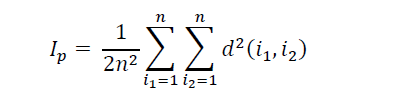

In [53]:
#nombre d'observations
n = X.shape[0] #18
#inertie version 1 -- distances entre paires d'individus 
Ip_v1 = 0
#double boucle (i1, i2) 
for i1 in range(n): 
    for i2 in range(n): 
        Ip_v1 = Ip_v1 + np.sum((X[i1,:]-X[i2,:])**2)
        
#moyenne des écarts entre paires d'individus 
Ip_v1 = (1/(2*n**2)) * Ip_v1 
print("Inertie, Approche 1 = %.2f" % (Ip_v1))

Inertie, Approche 1 = 0.94


**Inertie – Version 2.** 

Une autre manière de considérer l’inertie est de la voir comme une généralisation multidimensionnelle de la variance. Elle exprime alors la dispersion autour du barycentre G du nuage de points, défini par le vecteur composé des moyennes des (p) variables 𝑥̅=(𝑥̅1,…,𝑥̅𝑝)

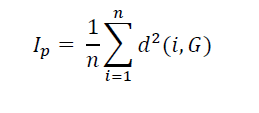

In [54]:
#moyennes des variables -- Coordonnées de G 
moyennes = np.mean(X,axis=0) 
print(moyennes) 


[2.56 1.23]


C:\Users\hp\AppData\Local\Temp\ipykernel_2244\3326876728.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([moyennes[0],D.Calories[i]],[moyennes[1],D.Fat_Cal[i]],color='silver',linestyle='dashed')


Text(2.5568705882352942, 1.2273058823529412, 'G')

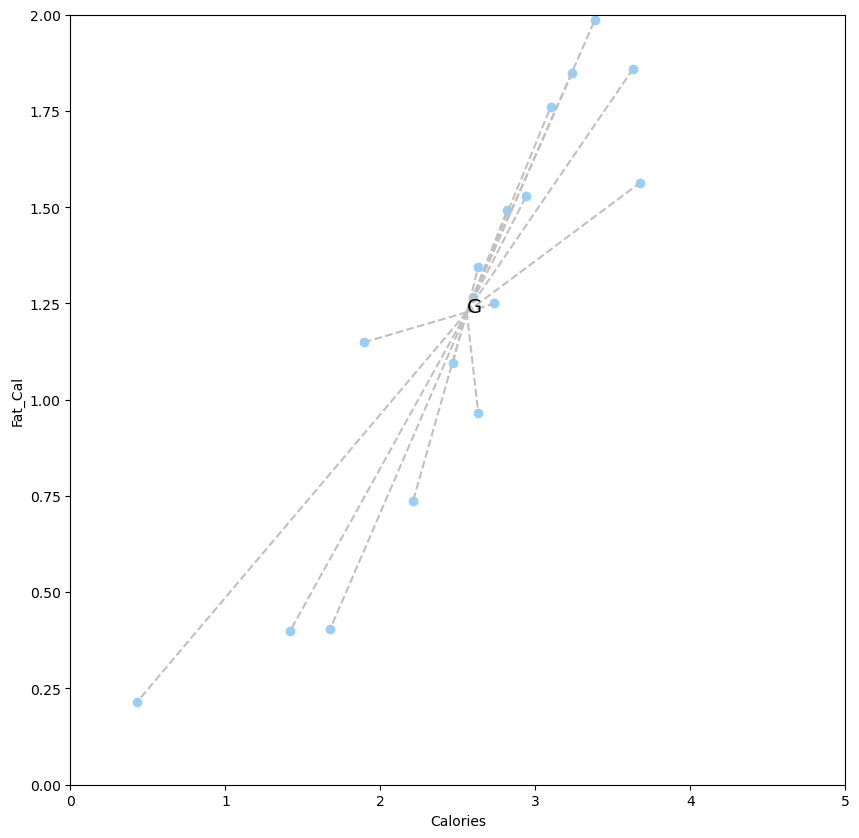

In [55]:
#graphique des points avec le barycentre G 
fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(D.Calories,D.Fat_Cal,color='xkcd:light blue',marker='o',linestyle='None') 
ax.axis([0,5,0,2]) 
ax.set_xlabel("Calories") 
ax.set_ylabel("Fat_Cal")
#ajouter des traits pointillés entre les points et le barycentre
for i in range(D.shape[0]):
    ax.plot([moyennes[0],D.Calories[i]],[moyennes[1],D.Fat_Cal[i]],color='silver',linestyle='dashed') 
#barycentre G 
ax.text(moyennes[0],moyennes[1],"G",fontsize=14) 
#faire afficher plt.show()

**Etablir la matrice de covariance et corrélation sur numpy**

In [56]:
#former la matrice X avec (p=10) variables maintenant 
X = D.values 
#calculer la matrice de covariance 

#rowvar = False pour dire que les variables sont organisées en colonnes 

#ddof = 0 degré de liberté pour utiliser (1/n) 

V = np.cov(X,ddof=0,rowvar=False) 

#numpy.set_printoptions(precision=2,suppress=True)

print(V)

[[ 0.66  0.39  0.01  0.04  0.01  0.08  0.92  0.05 -0.    0.02]
 [ 0.39  0.27  0.01  0.03  0.01  0.06  0.59  0.02 -0.    0.  ]
 [ 0.01  0.01  0.    0.    0.    0.01  0.07 -0.   -0.   -0.  ]
 [ 0.04  0.03  0.    0.    0.    0.01  0.07  0.   -0.    0.  ]
 [ 0.01  0.01  0.    0.    0.    0.    0.01  0.   -0.    0.  ]
 [ 0.08  0.06  0.01  0.01  0.    0.05  0.14 -0.   -0.    0.  ]
 [ 0.92  0.59  0.07  0.07  0.01  0.14  4.07 -0.    0.   -0.08]
 [ 0.05  0.02 -0.    0.    0.   -0.   -0.    0.01 -0.    0.01]
 [-0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.   -0.  ]
 [ 0.02  0.   -0.    0.    0.    0.   -0.08  0.01 -0.    0.01]]


In [57]:
V = np.cov(X,ddof=0,rowvar=False) 

np.set_printoptions(precision=2,suppress=True)

In [58]:
print(V)

[[ 0.66  0.39  0.01  0.04  0.01  0.08  0.92  0.05 -0.    0.02]
 [ 0.39  0.27  0.01  0.03  0.01  0.06  0.59  0.02 -0.    0.  ]
 [ 0.01  0.01  0.    0.    0.    0.01  0.07 -0.   -0.   -0.  ]
 [ 0.04  0.03  0.    0.    0.    0.01  0.07  0.   -0.    0.  ]
 [ 0.01  0.01  0.    0.    0.    0.    0.01  0.   -0.    0.  ]
 [ 0.08  0.06  0.01  0.01  0.    0.05  0.14 -0.   -0.    0.  ]
 [ 0.92  0.59  0.07  0.07  0.01  0.14  4.07 -0.    0.   -0.08]
 [ 0.05  0.02 -0.    0.    0.   -0.   -0.    0.01 -0.    0.01]
 [-0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.   -0.  ]
 [ 0.02  0.   -0.    0.    0.    0.   -0.08  0.01 -0.    0.01]]


In [59]:
#matrice des corrélations

R = np.corrcoef(X,rowvar=False) 

print(R)

[[ 1.    0.92  0.34  0.91  0.52  0.48  0.56  0.62 -0.21  0.28]
 [ 0.92  1.    0.39  1.    0.53  0.55  0.56  0.32 -0.1   0.08]
 [ 0.34  0.39  1.    0.39  0.47  0.6   0.75 -0.34 -0.28 -0.56]
 [ 0.91  1.    0.39  1.    0.53  0.55  0.56  0.3  -0.1   0.06]
 [ 0.52  0.53  0.47  0.53  1.    0.54  0.18  0.11 -0.49  0.16]
 [ 0.48  0.55  0.6   0.55  0.54  1.    0.32 -0.03 -0.28  0.08]
 [ 0.56  0.56  0.75  0.56  0.18  0.32  1.   -0.02  0.07 -0.41]
 [ 0.62  0.32 -0.34  0.3   0.11 -0.03 -0.02  1.   -0.13  0.77]
 [-0.21 -0.1  -0.28 -0.1  -0.49 -0.28  0.07 -0.13  1.   -0.13]
 [ 0.28  0.08 -0.56  0.06  0.16  0.08 -0.41  0.77 -0.13  1.  ]]


In [60]:
#calculer la trace de la matrice R 
trace = R.trace() 
print(trace)

10.0


#### ACP sur la matrice de corrélation avec numpy et sklearn

**De manière générale, les vecteurs et valeurs propres de la matrice R (en ACP normée) constituent les solutions de l’ACP : les vecteurs propres sont deux à deux orthogonaux, ils fournissent directement les coefficients (ajk) définissant les composantes principales (Fk) ; les valeurs propres (λk) traduisent la variance restituée par les facteurs.**

In [61]:
#calcul des valeurs et vecteurs propres 

sol = np.linalg.eig(R) 

print(sol)

EigResult(eigenvalues=array([4.53, 2.45, 1.41, 0.67, 0.48, 0.35, 0.09, 0.02, 0.  , 0.  ]), eigenvectors=array([[ 0.43,  0.2 , -0.17, -0.16,  0.02,  0.05, -0.24, -0.06,  0.38,
         0.72],
       [ 0.43,  0.07, -0.2 ,  0.14,  0.32,  0.22,  0.07, -0.09,  0.51,
        -0.57],
       [ 0.3 , -0.44,  0.15, -0.17, -0.3 , -0.18, -0.25, -0.67, -0.07,
        -0.14],
       [ 0.43,  0.06, -0.2 ,  0.15,  0.33,  0.22,  0.12, -0.13, -0.74,
         0.1 ],
       [ 0.32,  0.03,  0.44,  0.13,  0.35, -0.71, -0.02,  0.23, -0.01,
        -0.01],
       [ 0.33, -0.09,  0.26,  0.56, -0.54,  0.27, -0.13,  0.34, -0.02,
         0.  ],
       [ 0.31, -0.3 , -0.35, -0.37, -0.32, -0.21,  0.53,  0.36, -0.01,
        -0.03],
       [ 0.14,  0.55, -0.14, -0.36, -0.27, -0.12, -0.48,  0.19, -0.23,
        -0.35],
       [-0.15, -0.06, -0.67,  0.52, -0.09, -0.45, -0.2 , -0.07,  0.  ,
         0.02],
       [ 0.03,  0.6 ,  0.12,  0.18, -0.32, -0.17,  0.54, -0.42,  0.04,
         0.02]]))


In [62]:
#valeurs propres 
Vp=sol[0]
print(Vp)

[4.53 2.45 1.41 0.67 0.48 0.35 0.09 0.02 0.   0.  ]


In [63]:
#vecteurs propres 

print(sol[1][:,:])

[[ 0.43  0.2  -0.17 -0.16  0.02  0.05 -0.24 -0.06  0.38  0.72]
 [ 0.43  0.07 -0.2   0.14  0.32  0.22  0.07 -0.09  0.51 -0.57]
 [ 0.3  -0.44  0.15 -0.17 -0.3  -0.18 -0.25 -0.67 -0.07 -0.14]
 [ 0.43  0.06 -0.2   0.15  0.33  0.22  0.12 -0.13 -0.74  0.1 ]
 [ 0.32  0.03  0.44  0.13  0.35 -0.71 -0.02  0.23 -0.01 -0.01]
 [ 0.33 -0.09  0.26  0.56 -0.54  0.27 -0.13  0.34 -0.02  0.  ]
 [ 0.31 -0.3  -0.35 -0.37 -0.32 -0.21  0.53  0.36 -0.01 -0.03]
 [ 0.14  0.55 -0.14 -0.36 -0.27 -0.12 -0.48  0.19 -0.23 -0.35]
 [-0.15 -0.06 -0.67  0.52 -0.09 -0.45 -0.2  -0.07  0.    0.02]
 [ 0.03  0.6   0.12  0.18 -0.32 -0.17  0.54 -0.42  0.04  0.02]]


In [64]:
# vecteurs propres du pour le premier facteur
print(sol[1][:,0])

[ 0.43  0.43  0.3   0.43  0.32  0.33  0.31  0.14 -0.15  0.03]


In [65]:
# Calcul de sa norme 
print(np.linalg.norm(sol[1][:,0]))

0.9999999999999999


Est-ce que le repère factoriel est orthonormal ?
Pour le vérifier il faut faire le produit matriciel entre la transposé de matrice des vecteurs propres et la même matrice


In [66]:
print(np.dot(np.transpose(sol[1]),sol[1]))

[[ 1.  0.  0.  0. -0. -0. -0. -0.  0.  0.]
 [ 0.  1.  0.  0. -0. -0. -0. -0.  0.  0.]
 [ 0.  0.  1. -0.  0.  0. -0. -0.  0. -0.]
 [ 0.  0. -0.  1.  0. -0.  0.  0. -0.  0.]
 [-0. -0.  0.  0.  1.  0.  0. -0. -0.  0.]
 [-0. -0.  0. -0.  0.  1.  0. -0. -0. -0.]
 [-0. -0. -0.  0.  0.  0.  1.  0.  0. -0.]
 [-0. -0. -0.  0. -0. -0.  0.  1.  0.  0.]
 [ 0.  0.  0. -0. -0. -0.  0.  0.  1.  0.]
 [ 0. -0. -0.  0.  0. -0. -0.  0.  0.  1.]]


Notons Z la matrice centré réduite

In [67]:
#vecteur moyenne pour (p = 10) variables 
moy = np.mean(X,axis=0)

In [68]:
print(moy)

[2.56 1.23 0.11 0.14 0.05 0.33 4.7  0.23 0.01 0.07]


In [69]:
#matrice Z des variables centrées
Z = X - moy

print(pd.DataFrame(Z, index=D.index))

                                          0         1         2         3  \
ITEM                                                                        
BK__Double_Stacker                 0.680129  0.622394  0.067894  0.071529   
BK_CHICKENFRIES(12pc)              0.384329  0.302094  0.059194  0.034029   
Buck_Double                        0.038029  0.038494  0.046394  0.002629   
CHICKENTENDERS_Sandwich            0.541729  0.533294 -0.021006  0.060629   
ChocolateFudgeSundae              -0.880571 -0.822706 -0.070806 -0.090371   
DanishApple                        1.115029  0.335194 -0.058606  0.035329   
Double_Cheeseburger                0.074729  0.117694  0.046494  0.015429   
Double_Hamburger                  -0.091071 -0.131406  0.045194 -0.013271   
Double_Bacon_Cheeseburger          0.260829  0.264394  0.065794  0.029129   
GardenSalad(nochicken)            -2.124771 -1.011306 -0.080806 -0.111871   
KRAFT_MacaroniandCheese           -1.140971 -0.829106 -0.043606 -0.092371   

In [70]:
#vecteur ecart-type pour (p = 10) variables 
sigma = np.std(X,axis=0)

In [71]:
print(sigma)

[0.81 0.52 0.05 0.06 0.02 0.22 2.02 0.11 0.01 0.09]


In [72]:
#centrage et réduction

Z = (X - moy)/sigma
print(Z)

[[ 0.84  1.19  1.38  1.24  1.81  1.43  0.65 -0.61 -0.97 -0.37]
 [ 0.47  0.58  1.2   0.59 -0.72 -0.02  2.42 -0.42  0.85 -0.75]
 [ 0.05  0.07  0.94  0.05  0.78  0.98 -0.01 -0.52 -0.89 -0.4 ]
 [ 0.67  1.02 -0.43  1.05 -0.62 -0.38 -0.2   0.14 -0.78 -0.51]
 [-1.08 -1.57 -1.43 -1.56 -0.23 -0.99 -1.67  0.7  -0.97  2.05]
 [ 1.37  0.64 -1.19  0.61  1.43 -1.34 -0.32  2.39 -0.66  1.68]
 [ 0.09  0.22  0.94  0.27  1.08  1.06  0.45 -0.59 -0.97 -0.43]
 [-0.11 -0.25  0.92 -0.23  0.4   0.7  -0.56 -0.38 -0.81 -0.36]
 [ 0.32  0.51  1.33  0.5   1.39  1.17  0.82 -0.68 -1.01 -0.39]
 [-2.61 -1.93 -1.64 -1.93 -1.34 -1.24 -2.02 -1.79  0.98 -0.68]
 [-1.4  -1.58 -0.88 -1.6  -1.44 -1.11 -0.84 -0.35 -0.51 -0.33]
 [ 1.32  1.21 -1.24  1.16 -0.26  1.97 -0.57  1.83  0.86  2.6 ]
 [-0.43 -0.94  0.42 -0.9  -1.21 -0.42  0.83  0.09  0.57 -0.58]
 [ 0.22  0.04  0.39 -0.07  0.39  0.11 -0.01  0.54  0.54 -0.04]
 [ 1.02  1.45 -0.2   1.45 -0.4  -0.5   0.62  0.17  0.4  -0.49]
 [ 0.09 -0.5  -0.   -0.54 -1.06 -0.71  0.58  0.71  0.83

In [73]:
#outil pour l'ACP
from sklearn.decomposition import PCA 
acp = PCA()

In [74]:
#coordonnées factorielles
coord = acp.fit_transform(Z)

In [75]:
#afficher les nouvelles coordonnées 

print(pd.DataFrame(coord, index=D.index))

                                          0         1         2         3  \
ITEM                                                                        
BK__Double_Stacker                 3.127459 -1.046610 -1.210520  0.439524   
BK_CHICKENFRIES(12pc)              1.366619 -1.832960  1.894792 -0.654288   
Buck_Double                        0.971437 -0.925507 -1.334239  0.159823   
CHICKENTENDERS_Sandwich            0.784510  0.346840  0.454460 -0.503877   
ChocolateFudgeSundae              -2.871065  2.461960 -1.610034 -0.403206   
DanishApple                        1.174891  3.486505 -0.017283 -1.203828   
Double_Cheeseburger                1.421410 -1.082673 -1.305828  0.102218   
Double_Hamburger                   0.261705 -0.716004 -1.367521  0.102262   
Double_Bacon_Cheeseburger          2.107755 -1.308678 -1.309544  0.059469   
GardenSalad(nochicken)            -5.164219 -0.819841 -0.285442  1.055802   
KRAFT_MacaroniandCheese           -3.320327 -0.148490 -0.471731 -0.783428   

In [76]:
pca = PCA(n_components=2)  # Specify the number of components you want
pca.fit(X)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Convert to percentages
percentages = explained_variance_ratio * 100

# Display the percentages for each component
print(f"Comp.1: {percentages[0]:.2f}%, Comp.2: {percentages[1]:.2f}%")

Comp.1: 87.01%, Comp.2: 11.45%


Text(0, 0.5, 'Comp.2 (11.45%)')

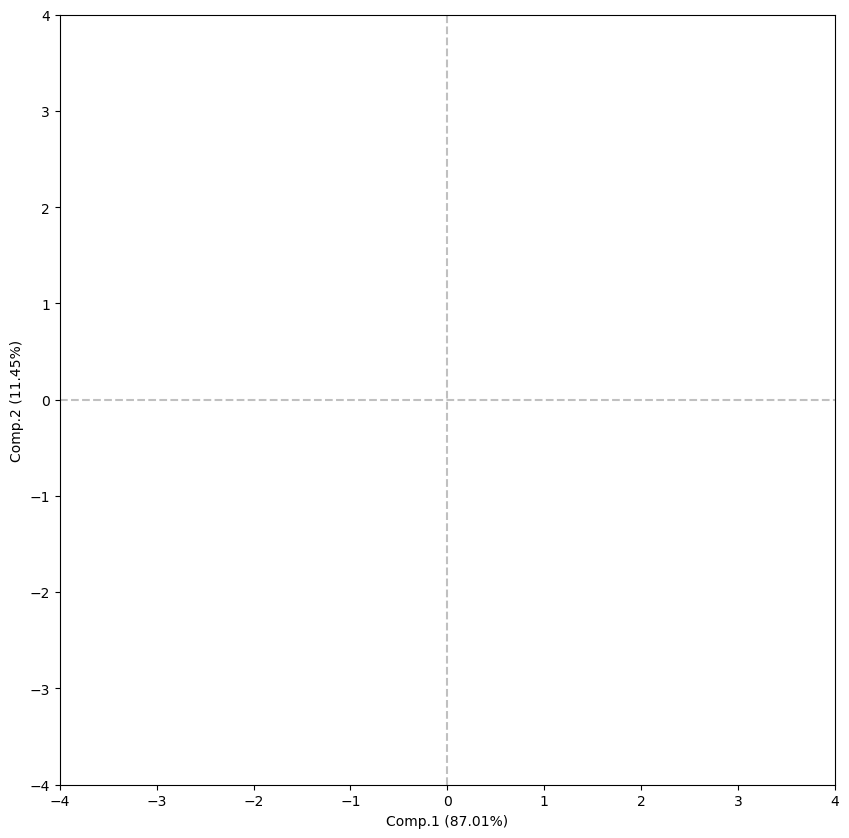

In [77]:
#position des burgers dans le repère factoriel 
fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(coord[:,0],coord[:,1],"wo") 
ax.axis([-4,+4,-4,+4]) 
ax.plot([-4,+4],[0,0],color='silver',linestyle='--') 
ax.plot([0,0],[-4,+4],color='silver',linestyle='--') 
ax.set_xlabel("Comp.1 (87.01%)") 
ax.set_ylabel("Comp.2 (11.45%)")

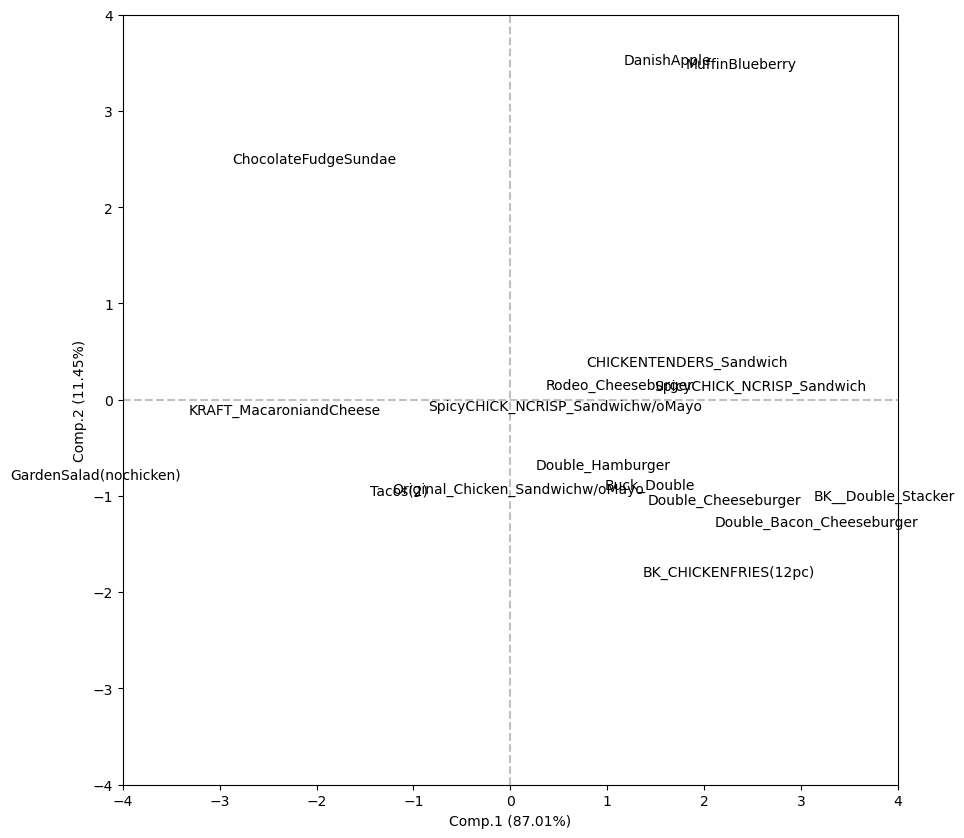

In [78]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(coord[:,0],coord[:,1],"wo") 
ax.axis([-4,+4,-4,+4]) 
ax.plot([-4,+4],[0,0],color='silver',linestyle='--') 
ax.plot([0,0],[-4,+4],color='silver',linestyle='--') 
ax.set_xlabel("Comp.1 (87.01%)") 
ax.set_ylabel("Comp.2 (11.45%)")

#ajouter les labels des véhicules 
for i in range(n): 
    ax.text(coord[i,0],coord[i,1],D.index[i])
    
plt.show()